# Project
- Due date: 11:59pm, Friday 08 October, 2021.

Name: zourui   

Student ID: 300535154

The aim of this assignment is to  develop a predictive model to determine if a loan application will be approved or not. The model will be based on the information store in file train.csv and will be tested using file test.csv.

## Data Format
A finance company offering home loans wants to automate the loan eligibility process based on customer detail provided while filling online application form. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

These details are:
- Loan_ID       =      Unique Loan ID
- Gender        =      Male/ Female
- Married       =      Applicant married (Y/N)
- Dependents    =      Number of dependents
- Education     =      Applicant Education (Graduate/ Under Graduate)
- Self_Employed =      Self-employed (Y/N)
- ApplicantIncome  =   Applicant income
- CoapplicantIncome =  Coapplicant income
- LoanAmount        =  Loan amount in thousands
- Loan_Amount_Term  =  Term of loan in months
- Credit_History    =  Credit history meets guidelines (0: Bad, 1: Good)
- Property_Area     =  Urban/ Semi Urban/ Rural
- Loan_Status       =  Loan approved (Y/N)


## Notes:
- In order to compute AUC-ROC and AUC-PR, your model needs to make predictions in probability or score (e.g., a number in [0, 1], for example, by using function predict_proba()). However, to compute accuracy and other metrics, you also need to predict classes (e.g., using predict() or thresholding the predicted probabilities).
- Use your own assumption and judgement if you are unsure about any information in the dataset. However, remember to mention it in discussion.
- Try to write functions for all data transformations you apply, try feature engineering(e.g., creating new features), and try to automate all the steps as much as possible (e.g. using Pipeline and data transformers, etc.). You may have bonus marks for this; however, your total mark will not excess 20.


In [1]:
import warnings
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [2]:
sklearn.__version__

'0.24.1'

### Task1: 
Use area under the ROC (AUC) as the primary evaluation metric. [2 marks]

- the use of ROC (AUC) is shown in task 4 & 5.

### Task2: 
Load the dataset, determine the target column, and remove irrelevant variables (if any). [2 marks]

In [3]:
# Load the data 
train_data = pd.read_csv(r'C:\Users\asus\Desktop\DATA201\DATASETS\train.csv')
test_data = pd.read_csv(r'C:\Users\asus\Desktop\DATA201\DATASETS\test.csv')

In [4]:
# determine the target column
target_column = 'Loan_Status'

In [5]:
# remove irrelevant variables
train_data = train_data.drop("Loan_ID", axis=1)
test_data = test_data.drop("Loan_ID", axis=1)

In [6]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural,Y
1,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
2,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,Y
3,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y
4,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban,N


In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,473.000000,480.0000,452.000000
mean,5354.780041,1562.686191,144.355180,342.5250,0.840708
std,6339.972679,2792.527894,81.475461,64.5011,0.366354
min,150.000000,0.000000,9.000000,12.0000,0.000000
25%,2833.000000,0.000000,100.000000,360.0000,1.000000
50%,3813.000000,1041.000000,126.000000,360.0000,1.000000
75%,5699.000000,2227.500000,165.000000,360.0000,1.000000
max,81000.000000,41667.000000,700.000000,480.0000,1.000000


In [8]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8080,2250.0,180.0,360.0,1.0,Urban,Y
2,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,1.0,Rural,Y
3,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban,Y
4,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             481 non-null    object 
 1   Married            488 non-null    object 
 2   Dependents         478 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      465 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         473 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     452 non-null    float64
 10  Property_Area      491 non-null    object 
 11  Loan_Status        491 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 46.2+ KB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             120 non-null    object 
 1   Married            123 non-null    object 
 2   Dependents         121 non-null    object 
 3   Education          123 non-null    object 
 4   Self_Employed      117 non-null    object 
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         119 non-null    float64
 8   Loan_Amount_Term   120 non-null    float64
 9   Credit_History     112 non-null    float64
 10  Property_Area      123 non-null    object 
 11  Loan_Status        123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


### Task3: 
Explore the training set to gain insights. [2 marks]

In [11]:
train_data["Dependents"].value_counts()

0     280
2      81
1      75
3+     42
Name: Dependents, dtype: int64

In [12]:
train_data["Education"].value_counts()

Graduate        384
Not Graduate    107
Name: Education, dtype: int64

In [13]:
train_data["Property_Area"].value_counts()

Semiurban    185
Urban        164
Rural        142
Name: Property_Area, dtype: int64

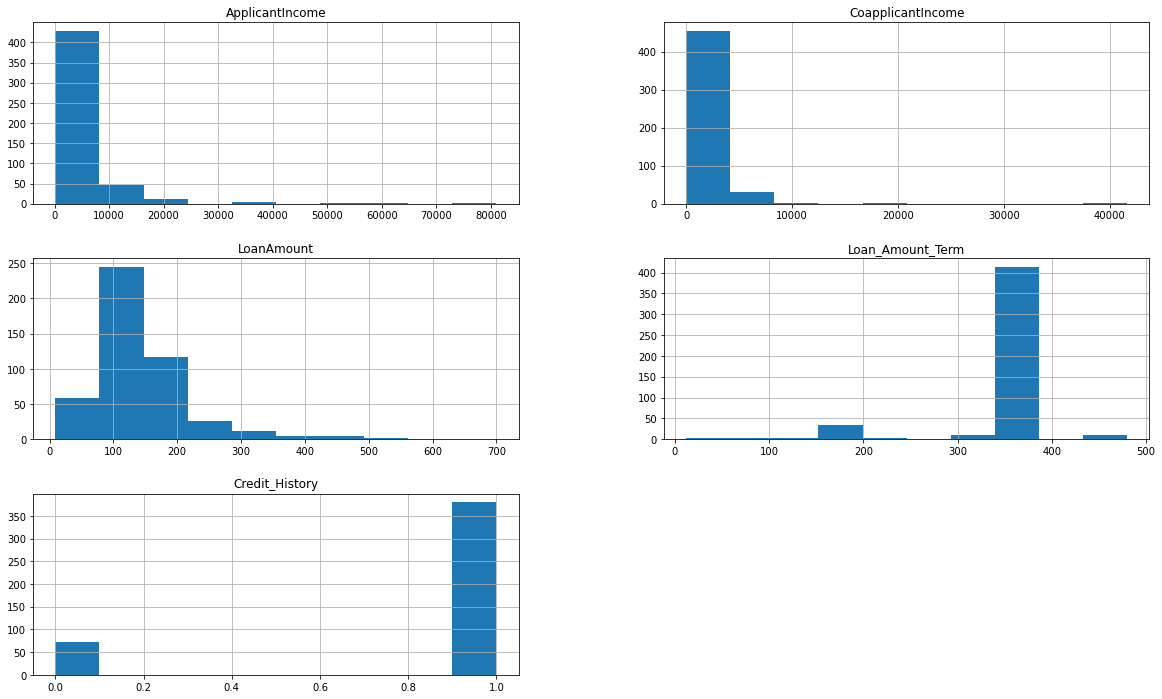

In [14]:
loan = train_data.copy()

loan.hist(figsize=(20,12));
fig = plt.gcf()
fig.savefig('hist.pdf', bbox_inches='tight');

* `LoanAmount`: there are not that many points for `LoanAmount > 400`;
* `ApplicantIncome` peaks around 0-10000, this was very likely the standard number of applicants income at the time of the data collection;
* most values of `CoapplicantIncome` , `Loan_Amount_Term` and `Credit_History` are close to zero.

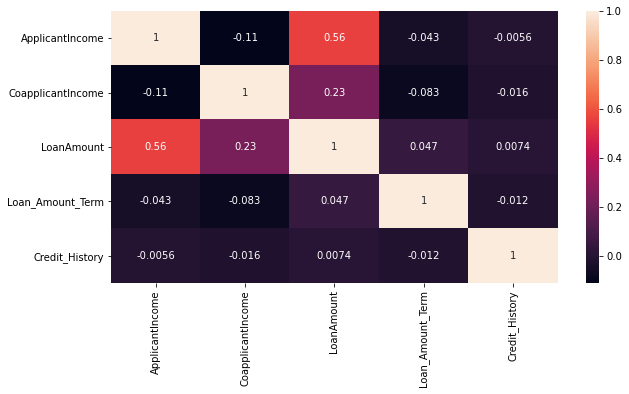

In [15]:
import seaborn as sns

plt.figure(figsize = (10,5))
sns.heatmap(loan.corr(), annot = True)
plt.show()

* There is a positive correlation between `ApplicantIncome` and `LoanAmount`, which is 0.56. 

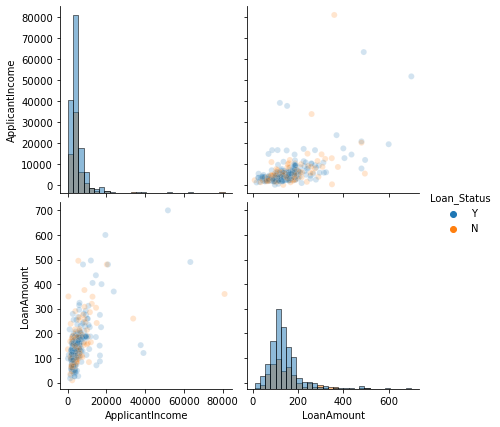

In [16]:
import seaborn as sns

n_samples_to_plot = 5000

columns = ['ApplicantIncome', 'LoanAmount']
sns.pairplot(data=loan[:n_samples_to_plot], vars=columns,
             hue="Loan_Status", plot_kws={'alpha': 0.2},
             height=3, diag_kind='hist', diag_kws={'bins': 30});

### Task4: 
Select one machine learning model, train, optimise (e.g., add pre-processing transformers, perform hyper-parameter tuning, etc.), and estimate the performance of the model. [10 marks]

In [17]:
# separate the predictors and the labels
X_train = train_data.drop("Loan_Status", axis=1)
y_train = train_data["Loan_Status"].copy()  # save the labels

In [18]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,1025,5500.0,216.0,360.0,NaN,Rural
1,Male,Yes,3+,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural
2,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban
3,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban
4,Male,Yes,2,Not Graduate,No,6125,1625.0,187.0,480.0,1.0,Semiurban


In [19]:
y_train.head()

0    Y
1    Y
2    Y
3    Y
4    N
Name: Loan_Status, dtype: object

In [20]:
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [21]:
X_train.shape

(491, 11)

In [22]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# a function for getting all categorical_columns, apart from Dependents
def get_categorical_columns(df):
    categorical_columns_selector = selector(dtype_include=object)
    categorical_columns = categorical_columns_selector(df.drop("Dependents", axis=1))
    return categorical_columns

In [23]:
get_categorical_columns(X_train)

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [24]:
# a function for getting all numerical_columns
def get_numerical_columns(df):
    numerical_columns_selector = selector(dtype_exclude=object)
    numerical_columns = numerical_columns_selector(df)
    return numerical_columns

In [25]:
get_numerical_columns(X_train)

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [26]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# a function for Transformation the data
def my_transformation(df):
    df = df.copy()
    
    numerical_columns = get_numerical_columns(df)
    nominal_columns = get_categorical_columns(df)
    ordinal_columns = ['Dependents']
    order = [['0', '1', '2', '3+']]
    
    numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler())])
    nominal_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OneHotEncoder(handle_unknown='ignore'))])
    ordinal_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                             ('encoder', OrdinalEncoder(categories=order,
                                                        handle_unknown='use_encoded_value', 
                                                        unknown_value=-1,)),
                             ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer([
        ('numerical_transformer', numerical_pipeline, numerical_columns),
        ('nominal_transformer', nominal_pipeline, nominal_columns),
        ('ordinal_transformer', ordinal_pipeline, ordinal_columns),
    ])
    
    # adding new features
    preprocessor2 = Pipeline([('pre', preprocessor), 
                              ('poly', PolynomialFeatures(degree=2, include_bias=False))])
    
    preprocessor2.fit(df)

    return preprocessor2

##### Prepare the data

In [27]:
preprocessor = my_transformation(X_train)
X_train_prepared = preprocessor.transform(X_train)
X_train_prepared.shape

(491, 170)

In [28]:
from sklearn.model_selection import GridSearchCV

# a function for tuning the model with hyper-parameter using grid search
def tune_model(model, param_grid, X_train_prepared):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
    grid_search.fit(X_train_prepared, y_train);
    print('grid_search.best_estimator_: ', grid_search.best_estimator_)
    final_model = grid_search.best_estimator_
    return final_model

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict

# a function for estimating the performance of the model with cross-validation
def estimat_model(model, X_train_prepared, y_train, score):
    cv = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X_train_prepared, y_train, cv=cv, scoring = score)
    return scores.mean()

#### Train a LogisticRegression model

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42,max_iter=1000).fit(X_train_prepared, y_train);

In [31]:
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
]

final_model_lr = tune_model(lr_model, param_grid, X_train_prepared)

grid_search.best_estimator_:  LogisticRegression(C=0.01, max_iter=1000, random_state=42)


#### Train a SVM model

In [68]:
from sklearn.svm import SVC

svm = SVC(random_state=42,probability=True).fit(X_train_prepared, y_train)

In [64]:
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000, 10000], 
     'gamma': [0.001, 0.01, 0.1, 1, 10, 'scale','auto']},
]

final_model_SVM = tune_model(svm, param_grid, X_train_prepared)

grid_search.best_estimator_:  SVC(C=1, probability=True, random_state=42)


#### Train a RandomForestClassifier model

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42).fit(X_train_prepared, y_train)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_features': randint(3, 11),
    'max_depth': randint(5, 100),
    'max_leaf_nodes':randint(2, 20),
    'min_samples_leaf': randint(2, 4),
}

final_model_rf = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5,
                                   scoring='accuracy', return_train_score=True, random_state=0)

final_model_rf.fit(X_train_prepared, y_train);
final_model_rf = final_model_rf.best_estimator_
final_model_rf

RandomForestClassifier(max_depth=14, max_features=6, max_leaf_nodes=6,
                       min_samples_leaf=3, n_estimators=120, random_state=42)

#### Train a DecisionTreeClassifier model

In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1, random_state=42).fit(X_train_prepared, y_train)

In [37]:
param_grid = [
    {'max_depth': [1, 2, 3, 5, 10, 20],
    'min_samples_leaf': [2, 3, 4, 5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]},
]

final_tree = tune_model(tree, param_grid, X_train_prepared)

grid_search.best_estimator_:  DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, random_state=42)


#### Train a KNeighborsClassifier model

In [38]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_prepared, y_train)

In [39]:
param_grid = [
    {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
]

final_clf = tune_model(clf, param_grid, X_train_prepared)

grid_search.best_estimator_:  KNeighborsClassifier(n_neighbors=9)


#### Train a GradientBoostingClassifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42).fit(X_train_prepared, y_train)

In [41]:
param_grid = [
    {'n_estimators': [10, 50, 100, 150, 200],
     'max_depth': [1, 2, 3, 5],
    'learning_rate': [0.01, 0.1]},
]

final_gbrt = tune_model(gbrt, param_grid, X_train_prepared)

grid_search.best_estimator_:  GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=42)


#### Train a VotingClassifier

In [69]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', final_model_lr), ('rf', final_model_rf), ('svc', final_model_SVM)],voting='soft')
voting_clf = voting_clf.fit(X_train_prepared, y_train)

##### The performance

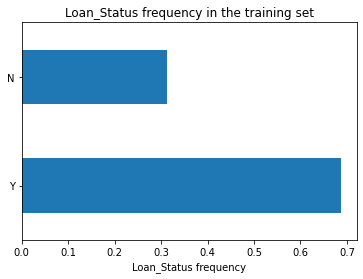

In [43]:
y_train.value_counts(normalize=True).plot.barh()
plt.xlabel("Loan_Status frequency")
plt.title("Loan_Status frequency in the training set");

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# a function for getting the performance of the model
def get_performance(model, X, y):
    res = []
    acc_mean = estimat_model(model, X, y, score = "accuracy")
    bc_mean = estimat_model(model, X, y, score = "balanced_accuracy")
    
    y_train_pred = cross_val_predict(model, X, y, cv=3)
    M = confusion_matrix(y, y_train_pred, labels=["N", "Y"])
    tn, fp, fn, tp = M.ravel()
    spe = tn / (tn + fp) 
    precision = precision_score(y, y_train_pred, pos_label="Y")
    recall = recall_score(y, y_train_pred, pos_label="Y")
    f1 = f1_score(y, y_train_pred, pos_label="Y")
    
    y_score = model.predict_proba(X)[:, 1]
    ROC = roc_auc_score(y, y_score)
    PR = average_precision_score(y, y_score, pos_label="Y")
    
    res.append([acc_mean, bc_mean, precision, recall, spe, f1, ROC, PR])
    return res

In [74]:
# a function to display all scores
def show_results(x, y, func):
    classifiers = [final_model_SVM, final_model_lr, final_model_rf, final_tree, final_clf, voting_clf, final_gbrt]
    names = ['SVM', 'LogisticRegression','RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'VotingClassifier','GradientBoostingClassifier']
    metrics = ['Accuracy', 'Balance-Acc','Precision', 'Recall(Sensitivity)','Specificity','F1-score', 'AUC-ROC', 'AUC-PR']
    data_res = [func(c, x, y)[0] for c in classifiers]
    results = pd.DataFrame(data=data_res, index=names, columns=metrics)
    return results

In [75]:
print('Training set model performance: ')
show_results(X_train_prepared, y_train, get_performance)

Training set model performance: 


,Accuracy,Balance-Acc,Precision,Recall(Sensitivity),Specificity,F1-score,AUC-ROC,AUC-PR
SVM,0.804556,0.698853,0.785203,0.976261,0.415584,0.870370,0.878261,0.922227
LogisticRegression,0.812698,0.711863,0.793765,0.982196,0.441558,0.877984,0.828317,0.896138
RandomForestClassifier,0.808617,0.705304,0.789976,0.982196,0.428571,0.875661,0.881518,0.933676
DecisionTreeClassifier,0.808617,0.705304,0.789976,0.982196,0.428571,0.875661,0.705384,0.788131
KNeighborsClassifier,0.798475,0.696174,0.781775,0.967359,0.409091,0.864721,0.840601,0.897138
VotingClassifier,0.812698,0.711863,0.793765,0.982196,0.441558,0.877984,0.868376,0.924112
GradientBoostingClassifier,0.810658,0.710500,0.791367,0.979228,0.435065,0.875332,0.843038,0.908035


## Comment:

From the above model oerformance metrics, we can see that `RandomForestClassifier` performances better than other Classifiers on the training dataset, it has the highest AUC-ROC with 0.88.


##### The ROC Curve

In [47]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train_prepared, y_train);

In [48]:
from sklearn.metrics import plot_roc_curve

def plot_roc(model, x, y):
    f = plot_roc_curve(model, x, y, pos_label='Y', ax=plt.figure(figsize=(5,5)).gca())
    f = plot_roc_curve(dummy_classifier, x, y, pos_label='Y', color="tab:orange", linestyle="--", ax=f.ax_)
    f.ax_.set_title("ROC AUC curve");
    f.figure_.savefig('roc_curve.pdf', bbox_inches='tight')

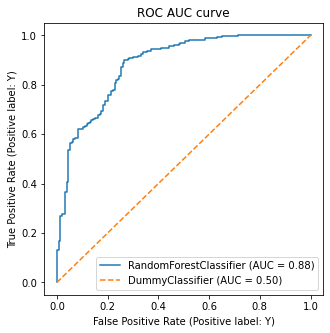

In [49]:
plot_roc(final_model_rf, X_train_prepared, y_train)

### Task5: 
Test the final model on the test set, report the AUC-ROC and other evaluation metrics (e.g., AUC-PR, accuracy, sensitivity, specificity, etc.) [3 marks]


In [51]:
# separate the test set and the labels
X_test = test_data.drop("Loan_Status", axis=1)
y_test = test_data["Loan_Status"].copy()  # save the labels

In [52]:
X_test_prepared = preprocessor.transform(X_test) 
X_test_prepared.shape

(123, 170)

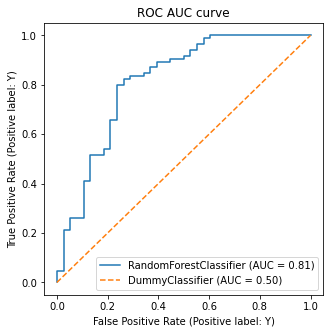

In [60]:
plot_roc(final_model_rf, X_test_prepared, y_test)

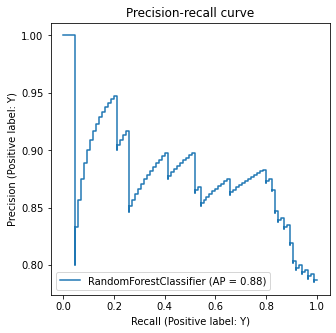

In [62]:
from sklearn.metrics import plot_precision_recall_curve

f = plot_precision_recall_curve(final_model_rf, X_test_prepared, y_test, pos_label='Y',
                                ax=plt.figure(figsize=(5,5)).gca())
f.ax_.set_title("Precision-recall curve");
f.figure_.savefig('pr_curve.pdf', bbox_inches='tight')

##### Evaluation metrics

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, average_precision_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# a function for getting all evaluation metrics
def get_metric(model, X, y):
    results = []
    predicted = model.predict(X)
    
    M = confusion_matrix(y, predicted, labels=["N", "Y"])
    tn, fp, fn, tp = M.ravel()
    
    spe = tn / (tn + fp)             # specificity, selectivity or true negative rate (TNR)
    ACC = accuracy_score(y, predicted)
    BAC = balanced_accuracy_score(y, predicted)
    
    precision = precision_score(y, predicted, pos_label="Y")
    recall = recall_score(y, predicted, pos_label="Y")
    F1 = f1_score(y, predicted, pos_label="Y")
   
    y_score = model.predict_proba(X)[:, 1]
    ROC = roc_auc_score(y, y_score)
    PR = average_precision_score(y, y_score, pos_label="Y")
    
    results.append([ACC, BAC, precision, recall, spe, F1, ROC, PR])
    return results

In [56]:
X_test_prepared.shape

(123, 170)

In [57]:
print('Test set model performance: ')
show_results(X_test_prepared, y_test, get_metric)

Test set model performance: 


,Accuracy,Balance-Acc,Precision,Recall(Sensitivity),Specificity,F1-score,AUC-ROC,AUC-PR
SVM,0.821138,0.710526,0.794393,1.000000,0.421053,0.885417,0.793034,0.857982
LogisticRegression,0.829268,0.723684,0.801887,1.000000,0.447368,0.890052,0.804954,0.857150
RandomForestClassifier,0.813008,0.704644,0.792453,0.988235,0.421053,0.879581,0.811765,0.878144
DecisionTreeClassifier,0.813008,0.704644,0.792453,0.988235,0.421053,0.879581,0.704644,0.791260
KNeighborsClassifier,0.837398,0.744118,0.815534,0.988235,0.500000,0.893617,0.778328,0.848559
VotingClassifier,0.829268,0.723684,0.801887,1.000000,0.447368,0.890052,0.809907,0.874775
GradientBoostingClassifier,0.813008,0.704644,0.792453,0.988235,0.421053,0.879581,0.784365,0.864763


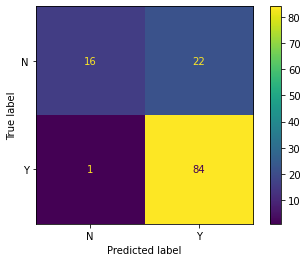

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model_rf, X_test_prepared, y_test);

## Comment:
- From the above model oerformance metrics, we can see that `RandomForestClassifier` performances better than other Classifiers on the test dataset.
- It has the highest AUC-ROC with 0.81 and AUC-PR 0.88.


### Task6: 
Include a discussion at the end of your Notebook (about what you have learnt, difficulties, what have worked and not worked, future directions, etc.). [1 mark]

##### Discussion:
There are only 491 instances in the train set and 123 instances in the test set. Notice that some attributes have missing values. We will need to take care of it by using SimpleImputer. Some attributes are numerical, while the others are object, meaning that we need to encode these nun-numerical columns by using OneHotEncoder for nominal columns and 
OrdinalEncoder for ordinal columns. 

By exploring the training set, looking at the distribution of individual features on the histograms shown that:
- There is a positive correlation between `ApplicantIncome` and `LoanAmount`, which is 0.56.

I also noticed that the Loan_Status frequency in both training dataset and test dataset are unbalanced. In this case, I used a balanced accuracy score instead of accuracy to evaluate the model performance. After training several models, I indicated that LogisticRegression and DecisionTreeClassifier had a higher balanced  accuracy score with 0.71. In the test set KNeighborsClassifier had the highest balanced  accuracy score with 0.73. However, LogisticRegression had a very similar score with 0.72.

I have also noticed that after adding extra features to the dataset, the training set accuracy is decreasing but the test set accuracy is increasing.

Overall, all scores for all models were not that good, none of them had a balanced  accuracy higher than 75%. This was due to the small sample size, we could have a better model performence if we have a larger dataset or better features.